In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#additions: 
#1. price high on weekends , low on weekdays

#some metrics
#flights with more number of stops will have higher price


data = pd.read_excel("Data_Train.xlsx")
#print(data[['Airline' , 'Source' , 'Destination']].head())
#print(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [2]:
#dropping null values
data.dropna(inplace = True)

In [3]:
#day of travel
data["Day_Of_Travel"] = pd.to_datetime(data.Date_of_Journey , format="%d/%m/%Y").dt.day
#month of travel
data["Month_Of_Travel"] = pd.to_datetime(data.Date_of_Journey , format="%d/%m/%Y").dt.month

#now date of journey col is not of use
data = data.drop("Date_of_Journey" , axis = 1)

In [4]:
#departure time
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

data = data.drop("Dep_Time" , axis=1)

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_24756\1860605449.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_24756\1860605449.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute


In [5]:
#arrival time
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

data = data.drop("Arrival_Time" , axis = 1)

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_24756\3149706003.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_24756\3149706003.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute


In [6]:
#converting the duration from string to actual hours and mins
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i] + " 0m"
        else:
            duration[i] = "0h " + duration[i] 

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep =  "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


data["Duration_Hours"] = duration_hours
data["Duration_Mins"] = duration_mins

data = data.drop("Duration" , axis = 1)



In [7]:
#airlines are part of nominal data , so we will use the technique of one hot encoding
#we will have to feed the model in binary format not in string format
#get_dummies is the function used for one hot encoding (in this we are onehot encoding airlines)

#selecting airline column
#double bracket for data frames
airline = data[["Airline"]]

#drop_first helps us to exclude redundant parameters
airline = pd.get_dummies(airline , drop_first = True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


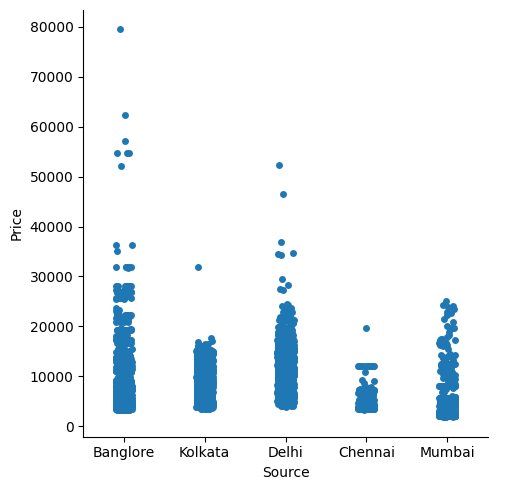

In [8]:
sns.catplot(data = data , y = 'Price' , x = 'Source')
plt.show()

In [9]:
#source is also a nominal category , we will perform onehotencoding on it
source = data[["Source"]]
source = pd.get_dummies(source , drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [10]:
#onehotEncoding on destination also
destination = data[["Destination"]]
destination = pd.get_dummies(destination , drop_first = True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [11]:
data = data.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4})
data.head()

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_24756\4101843557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4})


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_Of_Travel,Month_Of_Travel,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [12]:
training_data = pd.concat([data , airline , source , destination] , axis = 1)

training_data.drop(["Airline" , "Source" , "Destination"] , axis = 1 , inplace = True)
#training_data.shape

training_data.head()

,Route,Total_Stops,Additional_Info,Price,Day_Of_Travel,Month_Of_Travel,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,...,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,...,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,...,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,...,False,False,False,False,False,False,False,False,False,True


In [13]:
for col in training_data.columns:
    print(col , training_data[col].dtype)

Route object
Total_Stops int64
Additional_Info object
Price int64
Day_Of_Travel int32
Month_Of_Travel int32
Dep_hour int32
Dep_min int32
Arrival_hour int32
Arrival_min int32
Duration_Hours int64
Duration_Mins int64
Airline_Air India bool
Airline_GoAir bool
Airline_IndiGo bool
Airline_Jet Airways bool
Airline_Jet Airways Business bool
Airline_Multiple carriers bool
Airline_Multiple carriers Premium economy bool
Airline_SpiceJet bool
Airline_Trujet bool
Airline_Vistara bool
Airline_Vistara Premium economy bool
Source_Chennai bool
Source_Delhi bool
Source_Kolkata bool
Source_Mumbai bool
Destination_Cochin bool
Destination_Delhi bool
Destination_Hyderabad bool
Destination_Kolkata bool
Destination_New Delhi bool


In [14]:
#X -> features array
# .values converts data fram to array
X = training_data.drop(["Route" , "Additional_Info" , "Price"] , axis = 1).values
X = X.astype(float)
print(X.shape)
#print(X)

#Y -> target array
Y = training_data["Price"].values
print(Y.shape)

(10682, 29)
(10682,)


In [15]:
#normalising our features array because some large range features dominate the gradient
#some small range features barely get updated
#axis = 0 means that rows will collapse , columns will ke kept
#axis = 1 means that columns will collapse , rows will be kept

mean = X.mean(axis=0)
std_dev = X.std(axis=0)

X_norm = (X - mean) / std_dev

print(X_norm.mean(axis = 0))
print(X_norm.std(axis = 0))

print(X_norm.shape)

[-1.11417252e-16  3.99106573e-18  7.98213146e-18  7.25043608e-17
  6.31918741e-17  2.66071049e-17 -2.09530951e-17  7.05088279e-17
  1.52990853e-17 -5.18838545e-17 -6.25266965e-17 -1.69620294e-17
 -1.00441821e-16  2.66071049e-18  5.85356307e-17 -4.65624335e-18
  1.99553287e-17 -1.33035524e-18  5.38793874e-17 -6.31918741e-18
  2.72722825e-17  3.02655818e-17  5.95333972e-17  6.41896405e-17
  3.02655818e-17  7.18391832e-17  6.41896405e-17  2.72722825e-17
 -2.09530951e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
(10682, 29)


In [16]:
#starting out with mathematical representation of the model
m , n = X_norm.shape

#w is basically weight of each metric / parameter
#in simple words : w is how much a particular factors influences the final output
w = np.zeros(n,)
b = 0.0

print(w.shape)
print(b)


(29,)
0.0


In [17]:
def predict(X_norm , w , b):
    return np.dot(X_norm , w) + b

#use of dot function is important as it reshapes X_norm according to w

In [18]:
#y_hat is basically values predicted by model
y_hat = predict(X_norm , w , b)

In [19]:
#loss functions -> how wrong is my model
def mse_loss(y_actual , y_prediction):
    error = y_prediction - y_actual
    return np.mean(error ** 2)

In [20]:
m = Y.shape[0]

passes = 1000
learning_rate = 0.25

for trial in range(0 , passes + 1):
    y_hat = predict(X_norm , w , b)
    error = y_hat - Y

    dw = (2/m) * np.dot(X_norm.T, y_hat - Y)
    db = (2/m) * np.sum(y_hat - Y)

    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

    if trial % 100 == 0:
        loss = mse_loss(Y , y_hat)
        print(f"loss after {trial} trials: {loss}")
    



loss after 0 trials: 103841860.14510392
loss after 100 trials: 8010578.392318709
loss after 200 trials: 8006771.90486936
loss after 300 trials: 8006664.879743072
loss after 400 trials: 8006661.866292243
loss after 500 trials: 8006661.78144407
loss after 600 trials: 8006661.779055046
loss after 700 trials: 8006661.778987778
loss after 800 trials: 8006661.778985884
loss after 900 trials: 8006661.778985831
loss after 1000 trials: 8006661.778985828
